# <font color='#0091D0' size = 2><h1 align = "center">Use Data Science to Perform Informal Diagnosis for People with Autism</h1><font>

_<font size = 2><center>July 11 2019</center><font>_
_<font size = 2><center>Zhihao Fang</center><font>_
    
<img src="https://hellodoktor.com/wp-content/uploads/2017/06/bigstock-Autism-written-on-the-wipe-boa-85039910.jpg" width = "300"> 
<img src="https://i.postimg.cc/mZMnK3ST/1.png" width = "400">

## <font color='#0091D0'>What is data science, especially Machine Learning</font>

AI is not omnipotent. However, leveraging data science, we can obtain hidden insights we have never seee before, construct the pattern to predict the future, released from endless manual job, etc.

<img src="https://quantdare.com/wp-content/uploads/2016/03/Imagen1-800x384.png" width = "400">

## <font color='#0091D0'>Autism Spectrum Disorder</font>

Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication. 

Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, children I have known are dignosed after 3 years old, and early diagnosis can significantly reduce these.

Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. Therefore, I am thinking about to collect the data about the autism and use machine learning techonology to build a screen model to inform individuals whether they should pursue formal clinical diagnosis.


We'll be using the "Autistic Spectrum Disorder Screening Data for Adult" public dataset from the 
[`UCI (University of California, Irvine) repository`](http://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#).

## <font color='#0091D0'>Road Map </font>

* [Step 1](#step1): Import Datasets.

* [Step 2](#step2): Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

* [Step 3](#step3): A quick visualization with *Seaborn*. Look at the relationship among features will help us to understand data before we decide to apply algorithm.

* [Step 4](#step4): Data preprocessing- like normalization, convert categorical variables into numerical features. 

* [Step 5](#step5): I applied Decision Tree Machine Learning techniques on the data for classification purpose.

* [Step 6](#step6): Next, I used three different metric (such as accuracy, AUC score and F-score) to measure the performance of my models.

* [Step 7](#step7): Look at the feature importance.

* [Step 8](#step8): Conclusion.

* [Step 9](#step9): Oppotunity.


<img src="https://statuswhatsapp.co.in/wp-content/uploads/2016/04/journey-start.jpg" width="500" height="240" align="center"/>



---
<a id='step1'></a>
## <font color='#0091D0'>Step 1: Import dataset</font>
<img src="https://visualpharm.com/assets/893/Import-595b40b65ba036ed117d4468.svg" width = "100"> 

I start by importing the autism csv file into a Pandas dataframe and take a look at it. We'll be using the "Autistic Spectrum Disorder Screening Data for Adult" public dataset from the 
[`UCI repository`](http://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#)


In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

# set max rows 500 and max column 500 t0 display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

data = pd.read_csv('Autism_adult.csv')
data.head(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,18 and more,?,NO


<font color='#0091D0'>** Featureset Exploration **</font>

This data contains 704 instances, and contains 21 attributes:

* **Question 1-10 Answer**: *Binary* [0, 1] (The answer code of the question based on the screening method used).
* **age**: *number* (Age in years). 
* **gendar**: *String* [Male/Female]. 
* **ethnicity**: *String* (List of common ethnicities in text format). 
* **Born with jaundice**: *Boolean* [yes or no]. 
* **Country of residence **: *String* (List of countries in text format).
* **Used the screening app before **: *Boolean* [yes or no] (Whether the user has used a screening app).
* **Screening Score**: *Integer* (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).
* **age description**: 

* **Who is completing the test**: *String* [Parent, self, caregiver, medical staff, clinician ,etc.].


In [4]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals diagonised with ASD: {}".format(n_asd_yes)
print "Individuals not diagonised with ASD: {}".format(n_asd_no)
print "Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent)

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


---
<a id='step2'></a>
## <font color='#0091D0'>Step 2: Clean data</font>

<img src="https://www.invensis.net/blog/wp-content/uploads/2016/04/5-Best-Practices-in-Accounts-Payable-invensis1.png" width = "200"> 
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured. 

For this dataset, there are many invalid or missing entries(?) we must deal with. Preprocessing can improve the data quality and generate more powerful outcome.

Use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN.

In [5]:
data.head(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [6]:
asd_data = pd.read_csv('Autism_adult.csv', na_values=['?'])
asd_data.head(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


Generate descriptive statistics for fields whose type is number.

In [7]:
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


I found maximum age is 383, apparently, it is outlier. So it must be removed.

In [8]:
asd_data=asd_data[~asd_data['age'].isin([383])]
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,701.000000,703.000000
mean,352.926031,0.721195,0.453770,0.458037,0.496444,0.499289,0.284495,0.418208,0.650071,0.324324,0.574680,29.194009,4.880512
std,203.201765,0.448731,0.498213,0.498591,0.500343,0.500355,0.451495,0.493616,0.477287,0.468455,0.494743,9.711526,2.498992
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,177.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


How many missing value in the raw dataset?

In [9]:
asd_data_miss = asd_data[asd_data.isna().any(axis=1)]
asd_data_miss

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,5,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
12,13,0,1,1,1,1,1,0,0,1,0,17.0,f,NaN,no,no,Bahamas,no,6,18 and more,NaN,NO
13,14,1,0,0,0,0,0,1,1,0,1,17.0,m,NaN,no,no,Austria,no,4,18 and more,NaN,NO
14,15,1,0,0,0,0,0,1,1,0,1,17.0,f,NaN,no,no,Argentina,no,4,18 and more,NaN,NO
19,20,0,0,0,0,0,0,1,1,0,1,34.0,m,NaN,yes,no,United Arab Emirates,no,3,18 and more,NaN,NO
20,21,0,1,1,1,0,0,0,0,0,0,38.0,m,NaN,no,no,United Arab Emirates,no,3,18 and more,NaN,NO
24,25,1,1,1,1,0,0,0,1,0,0,43.0,m,NaN,no,no,Lebanon,no,5,18 and more,NaN,NO
25,26,0,1,1,0,0,0,0,1,0,0,24.0,f,NaN,yes,no,Afghanistan,no,3,18 and more,NaN,NO
62,63,0,0,0,0,0,0,0,0,0,0,NaN,m,NaN,no,no,Saudi Arabia,no,0,18 and more,NaN,NO
79,80,1,1,0,0,0,0,0,0,0,0,45.0,f,NaN,yes,no,Jordan,no,2,18 and more,NaN,NO


In [10]:
print '%s rows have missing data' % len(asd_data_miss)

95 rows have missing data


There are  a few missing values in the data set. Before I just drop every row that's missing data, I have to make sure not to create bias. In other words we need to make sure that missing data does not distribute on particular field. If there were, I'd have to try and go back and impute the missing data with values.

Since the missing data seems randomly distributed, I go ahead and drop rows with missing data. 

In [11]:
asd_data.dropna(inplace=True)
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,350.213816,0.740132,0.470395,0.481908,0.521382,0.526316,0.307566,0.429276,0.666118,0.342105,0.598684,29.634868,5.083882
std,207.677882,0.438923,0.499534,0.500084,0.499954,0.499718,0.461866,0.495380,0.471986,0.474805,0.490568,9.694080,2.519356
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,166.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,329.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,533.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


Let's count the total number of instances and the target-class distribution after removing outlier and missing data.

In [12]:
# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals diagonised with ASD: {}".format(n_asd_yes)
print "Individuals not diagonised with ASD: {}".format(n_asd_no)

Total number of records: 608
Individuals diagonised with ASD: 180
Individuals not diagonised with ASD: 428


---
<a id='step3'></a>
## <font color='#0091D0'>Step 3: A quick visualization</font>

Look at the relationship among features will help us to understand data before we decide to apply algorithm.
<img src="https://wwwstatic-d.lookercdn.com/product/visualizations/sunburst_animation.png" width = "400"> 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

<font color='#0091D0'>Figure 1</font>   
A special form of Factorplot where we display the connection
between several attributes from our data set and how they are related with our target class.  
In this case, we can see when `jaundice' is present at birth, an individual with a higher
`result' score will have autism irrespective of their gender.

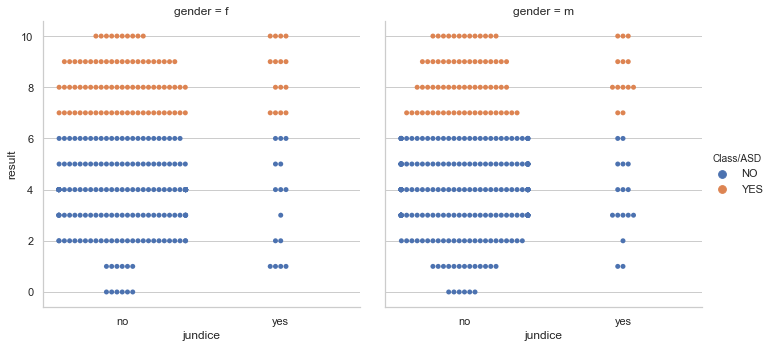

In [14]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm")

<font color='#0091D0'>Figure 2</font>  

A violine plot showing how the ASD classes is related with the attributes
`result` & `jundice`.

an individual with a higher `result` score is more likely to have autism, independent of `jundice`.

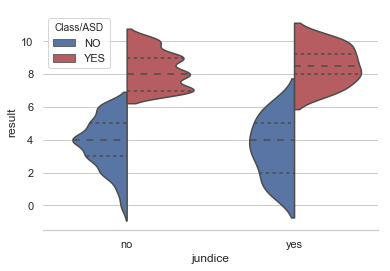

In [15]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

<font color='#0091D0'>Figure 3</font>  

A violine plot showing how the ASD classes is related with the attributes
`result` & `gender`.

an individual with a higher `result` score is more likely to have autism, independent of `gender`.

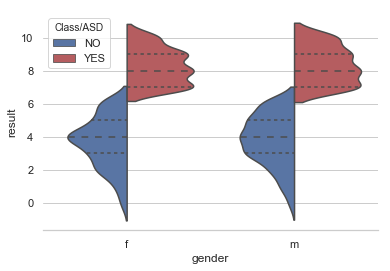

In [16]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

<font color='#0091D0'>Figure 4</font>  

We present another variation of a violin plot where we look at how the distribution of `autism` varies by `relation` (Self, Parent, ...), subdivided by whether the
patient was born with jaundice (`jundice`) and the patient's `gender`.

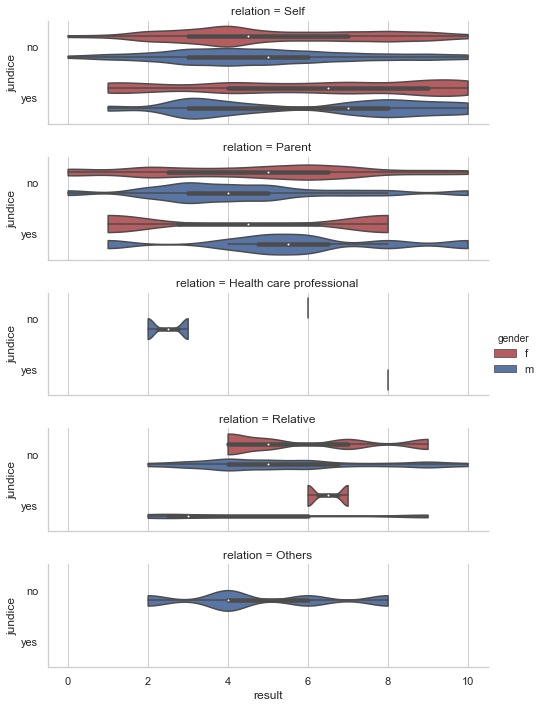

In [17]:
g = sns.catplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", height=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

**From these 4 figures, it is found out the autism is strongly associated with socre, and gender, jundice are not that important.**

---
<a id='step4'></a>
## <font color='#0091D0'>Step 4: Data preprocessing</font>

<img src="http://www.grroups.com/uploads_media/d06b6a7aa911f1b35689a111ab842e5d.jpeg" width = "500"> 


#### <font color='#0091D0'>Split data into feature and class</font>

In [18]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

#### <font color='#0091D0'>Normalization</font>
Models require the input data to be normalized. In other words,transforms features by scaling each feature to a given range. 

In [19]:
asd_data[:5]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
5,6,1,1,1,1,1,0,1,1,1,1,36.0,m,Others,yes,no,United States,no,9,18 and more,Self,YES


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

import warnings

warnings.filterwarnings('ignore')

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.191489,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.148936,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.212766,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.382979,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.404255,m,Others,yes,no,United States,0.9,Self,1,1,1,1,1,0,1,1,1,1


#### <font color='#0091D0'>One-Hot-Coding</font>

From the table in **Clean Data Sets** above, we can see there are several features for each record that are non-numeric such as `Country_of_residence`, `ethnicity` etc. Machine earning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `contry_of_res` has three possible entries: `United States`, `Brazil`, or `Spain`. We then encode this feature into `contry_of_res_United States`, `contry_of_res_Brazil` and `contry_of_res_Spain`.

In [22]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_Afghanistan,contry_of_res_AmericanSamoa,contry_of_res_Angola,contry_of_res_Armenia,contry_of_res_Aruba,contry_of_res_Australia,contry_of_res_Austria,contry_of_res_Bahamas,contry_of_res_Bangladesh,contry_of_res_Belgium,contry_of_res_Bolivia,contry_of_res_Brazil,contry_of_res_Burundi,contry_of_res_Canada,contry_of_res_Chile,contry_of_res_China,contry_of_res_Costa Rica,contry_of_res_Cyprus,contry_of_res_Czech Republic,contry_of_res_Ecuador,contry_of_res_Egypt,contry_of_res_Ethiopia,contry_of_res_Finland,contry_of_res_France,contry_of_res_Germany,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Jordan,contry_of_res_Malaysia,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_New Zealand,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Saudi Arabia,contry_of_res_Serbia,contry_of_res_Sierra Leone,contry_of_res_South Africa,contry_of_res_Spain,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.191489,0.6,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.148936,0.5,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.212766,0.8,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.382979,0.6,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0.404255,0.9,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


94 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'con

In [23]:
# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

#### <font color='#0091D0'> Shuffle and Split Data</font>
Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
#asd_data

import warnings

warnings.filterwarnings('ignore')

Training set has 486 samples.
Testing set has 122 samples.


---
<a id='step5'></a>

##  <font color='#0091D0'>Step 5: Model - Decision Trees</font>
A decision tree can be used to visually represent decisions and decision making. It is widely used in machine learning as it is easy to explain.





### <img src="https://cn.bing.com/th?id=OIP.1WG3ZB74_PiVYqLRthXVKQHaFP&pid=Api&rs=1&p=0g" width = '400'> 


####  <font color='#0091D0'>A simple case</font>

<img src="https://www.advocatemagazine.com/media/zoo/images/Reeves-decision-making2_53002ad482767fd42cbcfbba0248e09c.jpg" width = "500"> 

I start with creating a DecisionTreeClassifier and fit it to the training data.

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Depiction of Decision Tree algorithm

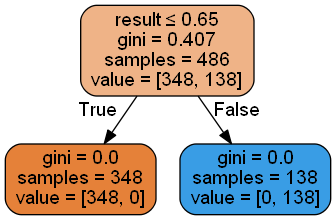

In [24]:
import pydotplus 
dot_data = StringIO()
feature_name = list(X_train.columns)
tree.export_graphviz(dectree,out_file = dot_data,feature_names=feature_name,
                     filled=True,rounded=True,
                     special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

from IPython.display import Image 
Image(graph.create_png()) 

---
<a id='step6'></a>
## <font color='#0091D0'>Step 6: Evaluating model performance</font>  


<img src="https://fitsmallbusiness.com/wp-content/uploads/2017/11/11-Free-Interview-Evaluation-Forms-Scorecard-Templates.png" width = "400"> 



**Train set to train model**

**Test set to evaluate**

####  <font color='#0091D0'>Metric</font>
* Accuracy
* Precision
* Recall
* F score

<img src="https://i.postimg.cc/xdjD26Pw/14.png" width = "500">

`True Positive`: Prediction is 1 and actual value is 1, let's say 40  
`False Positive`: Prediction is 1 and actual value is 0, let's say 10   
`False Negative`: Prediction is 0 and actual value is 1, let's say 20  
`True Negative`: Prediction is 0 and actual value is 0, let'sa say 30  


**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

`[(True Positives + True negatives)/Total)] = (40+30)/100 = 0.7`

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)] = 40/(40+10) = 0.8`

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of


`[True Positives/(True Positives + False Negatives)] = 40/(40+20) = 0.7`



We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity). F score is a weighted average(harmonic mean) of the precision and recall scores.

In [26]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [27]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[80  0]
 [ 0 42]]


####  <font color='#0091D0'>Metrics computed from a confusion matrix</font>

**Classification Accuracy**: Overall, how often is the classifier correct?

In [28]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


**Recall**: When the actual value is positive, how often is the prediction correct?


In [29]:
print metrics.recall_score(y_test, y_pred_class)

1.0


**Precision**: When a positive value is predicted, how often is the prediction correct?

In [30]:
print metrics.precision_score(y_test, y_pred_class)

1.0


**F socre**

In [31]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

Till now, we can say our model performs very good. We use all features into model, but after visualization, we found some features are not important, why not drop them？

---
<a id='step7'></a>
## <font color='#0091D0'>Step 7: Feature importance</font>

<img src="http://www.evolved-analytics.com/sites/default/files/featureSelection_0.png" width = "500"> 


Not every feature is important. I used all features into the decision tree model and it performs good. But think about we have millions of instances and throunds of features, if we do not do any feature selection, the system will be very complicated and it will lead to the problem which is overfitting. Therefore, one important thing is to determine which features provied the most predictive power, in another word, to sort the features by their importance and choose a small number of featuers.


I am using correlation method which is to calculate the correlation between each x and y and choose xs with top highest correlation value.

In [71]:
df = pd.concat([features_final, pd.DataFrame(asd_classes)], axis = 1)

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

If we only want to choose top 5 most important features, according to the correlation value between each feature and class. 
They are:

* `result`
* `A1_score`
* `A3_score`
* `A4_score`
* `A5_score`
* `A6_score`

---
<a id='step8'></a>
## <font color='#0091D0'>Step 8: Conclusion</font>

My model work extremely well with the data. I have used three different metric (such as accuracy, AUC score and F-score) to measure the performance of my models, and it seems like all of the metric indicated an almost perfect classification of the ASD cases.

Here I think the reason of this high performances with different models is the fact that only one of the feature `result` is predominant over all others which I confirmed with the Feature Importance section in this notebook.

I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough. 

---
<a id='step9'></a>
## <font color='#0091D0'>Step 9: Oppotunity</font>


<img src="https://bpm.com/images/blogs2015/fingar/affectivecomputing1.png" width = "500"> 


We can design a smartch watch which consists of emotion detect module. We can leverage affective computing technology and large amount of data including heart rate, electrodermal activity.